In [1]:
import pandas as pd
import numpy as np

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# 1. General Feature Extraction

### file loading

In [3]:
df= pd.read_csv('data/sentiment140.csv', encoding = "latin1", header=None)

In [4]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
df=df[[5,0]]
df.columns=['twits','sentiment']
df

,twits,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [6]:
df['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [7]:
sent_map={0:'negative',4:'positive'}

### Word counts

In [8]:
df['word_count']=df['twits'].apply(lambda x: len(str(x).split()))

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.head()

,twits,sentiment,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


### Chracters count

In [10]:
df['char_count']=df['twits'].apply(lambda x: len(x))
df.head()

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,twits,sentiment,word_count,char_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


### average characters per word

In [11]:
df['avg_word_len']=df['twits'].apply(lambda x: (len(x)-len(str(x).split())+1)/len(str(x).split()))
df.head()                                 

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,twits,sentiment,word_count,char_count,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.105263
1,is upset that he can't update his Facebook by ...,0,21,111,4.333333
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.000000
3,my whole body feels itchy and like its on fire,0,10,47,3.800000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.333333


### stop words count

In [12]:
print(STOP_WORDS)

{'done', 'see', 'where', 'can', 'becomes', '’re', 'each', 'another', 'this', 'must', 'someone', 'becoming', 'yours', '’ve', 'behind', 'yet', 'yourself', 'our', 'beyond', 'it', "n't", 'per', '‘s', 'whereas', 'nothing', 'due', 'he', 'n’t', 'towards', 'really', 'from', 'once', 'before', 'throughout', '‘d', '‘m', 'hereby', 'thereby', 'ca', 'beside', 'of', 'six', 'something', "'re", 'whence', 'down', 'using', 'anything', 'those', 'either', 'may', 'beforehand', 'make', 'to', 'they', 'being', '‘re', 'their', 'although', 'your', "'d", 'hereafter', 'whatever', 'herself', 'its', 'too', 'amongst', '’d', 'except', 'me', 'again', 'everywhere', 'various', 'might', 'do', 'seeming', 'regarding', 'indeed', 'give', 'i', 'whither', 'or', 'themselves', 'every', 'out', 'if', 'yourselves', 'with', 'whereafter', '‘ve', 'nevertheless', 'at', 'anyone', 'should', 'get', 'myself', 'also', 'seems', 'just', 'well', 'made', 'call', 'doing', 'him', 'many', 'own', 'hundred', 'go', 'how', 'and', 'her', 'namely', 'whom

In [13]:
text='this is the text'
[t for t in text.split() if t in STOP_WORDS]

['this', 'is', 'the']

In [14]:
df['stopwords_len']=df['twits'].apply(lambda x:len([t for t in x.split() if t in STOP_WORDS]))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.105263,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.333333,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.000000,7
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.333333,10


### count #hashtag and @mentions

In [15]:
df['hashtag_len']=df['twits'].apply(lambda x:len([t for t in x.split() if t.startswith('#')]))
df['mention_len']=df['twits'].apply(lambda x:len([t for t in x.split() if t.startswith('@')]))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.105263,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.333333,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.000000,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.333333,10,0,1


### if numeric digits are present in twitts

In [16]:
df['numeric_count']=df['twits'].apply(lambda x:len([t for t in x.split() if t.isdigit()]))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.105263,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.333333,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.000000,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.333333,10,0,1,0


### upper case word counts

In [17]:
df['upper_count']=df['twits'].apply(lambda x:len([t for t in x.split() if t.isupper() and len(t)>3]))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.105263,4,0,1,0,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.333333,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,4.000000,7,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.333333,10,0,1,0,0


# 2. Preprocessing and Cleaning

### lower case conversion

In [18]:
df['twits']=df['twits'].apply(lambda x:x.lower())
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.105263,4,0,1,0,0
1,is upset that he can't update his facebook by ...,0,21,111,4.333333,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,4.000000,7,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.333333,10,0,1,0,0


### contraction to expansion

In [19]:
x="i don't know what you want,can't, he'll,i'd."

In [20]:
contractions={
"aren't":"are not","can't":'cannot',"couldn't":"could not","didn't":"did not","doesn't":"does not","don't":"do not",
"hadn't":"had not","hasn't":"has not","haven't":"have not","he'd ":"he would","he'll":"he will","he's":"he is",
"i'd":"i would","i'll":"i will","i'm":"i am","i've":"i have","isn't":"is not","it's":"it is","it'd":"it would",
"let's":"let us","mightn't":"might not","mustn't":"must not","shan't":"shall not","she'd":"she would","she'll":"she will","she's":"she is","shouldn't":"should not",
"that's":"that is","there's":"there is","the'd":"they would","they'll":"they will","they're":"they are","they've":"they have",
"we'd":"we would","we're":"we are","we've":"we have","weren't":"were not","what'll":"what will","what're":"what are",
"what's":"what is","what've":"what have","where's":"where is","who'd":"who would","who'll":"who will","who're":"who are",
"who's":"who is","who've":"who have","won't":"will not","wouldn't":"would not","you'd":"you would","you'll":"you will",
"you're":"you are","you've":"you have"," u ":" you "," ur ":" your "," n ":" and "
}

In [21]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [22]:
x="hi, i'd be happy with u and ur mom"
cont_to_exp(x)

'hi, i would be happy with you and your mom'

In [23]:
df['twits']=df['twits'].apply(lambda x: cont_to_exp(x))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.105263,4,0,1,0,0
1,is upset that he cannot update his facebook by...,0,21,111,4.333333,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,4.000000,7,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.333333,10,0,1,0,0


### emails removal and counts

In [24]:
import re

In [25]:
x='hi email me 123@naver.com another@adsasd.aa'

In [26]:
re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x)

['123@naver.com', 'another@adsasd.aa']

In [27]:
re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','',x)

'hi email me  '

In [28]:
df['emails']=df['twits'].apply(lambda x: re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,emails
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.105263,4,0,1,0,0,[]
1,is upset that he cannot update his facebook by...,0,21,111,4.333333,9,0,0,0,0,[]
2,@kenichan i dived many times for the ball. man...,0,18,89,4.000000,7,0,1,0,0,[]
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5,0,0,0,0,[]
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.333333,10,0,1,0,0,[]


In [29]:
df['email_count']=df['emails'].apply(lambda x: len(x))
df[df['email_count']>0]

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,emails,email_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,4.200000,6,0,0,0,1,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,9.666667,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,5.550000,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.625000,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,5.571429,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,5.095238,10,0,1,0,0,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,5.600000,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,5.857143,6,0,1,0,0,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,7.666667,2,0,1,0,0,[jill@q985fm.com],1


In [30]:
df['twits']=df['twits'].apply(lambda x: re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)','',x))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,emails,email_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.105263,4,0,1,0,0,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.333333,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,4.000000,7,0,1,0,0,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.333333,10,0,1,0,0,[],0


### removal of URL and RT

In [31]:
x='hi visit http://youtube.com/kgptalkie'

In [32]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=&%:/~+#-]*[\w@?^=&%:/~+#-])?',x)

[('http', 'youtube.com', '/kgptalkie')]

In [33]:
re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=&%:/~+#-]*[\w@?^=&%:/~+#-])?','',x)

'hi visit '

In [34]:
df['twits']=df['twits'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=&%:/~+#-]*[\w@?^=&%:/~+#-])?','',x))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,emails,email_count
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.105263,4,0,1,0,0,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.333333,9,0,0,0,0,[],0
2,@kenichan i dived many times for the ball. man...,0,18,89,4.000000,7,0,1,0,0,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5,0,0,0,0,[],0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.333333,10,0,1,0,0,[],0


In [35]:
df['twits']=df['twits'].apply(lambda x: re.sub('RT','',x))

### removing special chars and punctuation

In [36]:
df['twits']=df['twits'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+','',x))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,emails,email_count
0,switchfoot - awww that is a bummer you shoul...,0,19,115,5.105263,4,0,1,0,0,[],0
1,is upset that he cannot update his facebook by...,0,21,111,4.333333,9,0,0,0,0,[],0
2,kenichan i dived many times for the ball manag...,0,18,89,4.000000,7,0,1,0,0,[],0
3,my whole body feels itchy and like its on fire,0,10,47,3.800000,5,0,0,0,0,[],0
4,nationwideclass no it is not behaving at all i...,0,21,111,4.333333,10,0,1,0,0,[],0


### remove multiple spaces  "     "

In [37]:
x="tnkas     dsad   dd  s s "

In [38]:
" ".join(x.split())

'tnkas dsad dd s s'

In [39]:
df['twits']=df['twits'].apply(lambda x: " ".join(x.split()))

### remove HTML tags

In [40]:
pip install bs4

In [41]:
from bs4 import BeautifulSoup

In [42]:
x='<html><h2>thanks for watching</h2></html>'

In [43]:
#BeautifulSoup(x,'lxml').get_text()

In [44]:
#df['twits']=df['twits'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())

### remove  accented chars(위에 악센트 붙어있는것)

In [45]:
import unicodedata

In [46]:
def remove_accent(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [47]:
#df['twits']=df['twits'].apply(lambda x: remove_accent(x))
#시간 오래걸림

# 3. Spacy and NLP

### remove stopwords

In [48]:
import spacy

In [49]:
x="this is stop words"

In [50]:
" ".join([t for t in x.split()if t not in STOP_WORDS])

'stop words'

In [51]:
df['twits']=df['twits'].apply(lambda x: " ".join([t for t in x.split()if t not in STOP_WORDS]))
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,emails,email_count
0,switchfoot - awww bummer shoulda got david car...,0,19,115,5.105263,4,0,1,0,0,[],0
1,upset update facebook texting cry result schoo...,0,21,111,4.333333,9,0,0,0,0,[],0
2,kenichan dived times ball managed save 50 rest...,0,18,89,4.000000,7,0,1,0,0,[],0
3,body feels itchy like fire,0,10,47,3.800000,5,0,0,0,0,[],0
4,nationwideclass behaving mad,0,21,111,4.333333,10,0,1,0,0,[],0


### convert into base form of word

In [52]:
nlp=spacy.load('en_core_web_sm')

In [53]:
x='kenichan dived times ball managed save 50 res'

In [54]:
def make_to_base(x):
    x_list=[]
    doc=nlp(x)
    for token in doc:
        lemma=str(token.lemma_)
        if lemma == '-PRON-' or lemma =='be':
            lemma=token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [55]:
make_to_base(x)

kenichan dive times ball manage save 50 re


In [56]:
#df['twits']=df['twits'].apply(lambda x:make_to_base(x))
#시간 오래걸림

### common or rare words removal

In [57]:
' '.join(df.head()['twits'])

'switchfoot - awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [58]:
text=' '.join(df['twits'])

In [59]:
text=text.split()
freq_com=pd.Series(text).value_counts()
freq_com

good           89366
day            82299
like           77725
-              69662
today          64512
               ...  
skyeeyks           1
geminipinai        1
law319             1
agnimidhun         1
shoes-very         1
Length: 787306, dtype: int64

In [60]:
f20=freq_com[0:20]

In [61]:
df['twits']=df['twits'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

In [62]:
r20=freq_com[-20:]
r20

chrisjohn9        1
jessikaos         1
shelleykey        1
hamesyy           1
ou17242005        1
bffjenny827       1
tiredgrumpyahh    1
twigguhhhs        1
moneyjust         1
websitekind       1
queenofthemorn    1
tweet-rate        1
hoyy              1
thegreenees       1
state-its         1
skyeeyks          1
geminipinai       1
law319            1
agnimidhun        1
shoes-very        1
dtype: int64

In [63]:
rare=freq_com[freq_com.values==1]
rare

ultimas          1
camii            1
wordburglar      1
sillymillyy      1
experienceads    1
                ..
skyeeyks         1
geminipinai      1
law319           1
agnimidhun       1
shoes-very       1
Length: 536078, dtype: int64

In [64]:
df['twits']=df['twits'].apply(lambda x: " ".join([t for t in x.split() if t not in r20]))

### word cloud visualization

In [65]:
!pip install wordcloud

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
text

['switchfoot',
 '-',
 'awww',
 'bummer',
 'shoulda',
 'got',
 'david',
 'carr',
 'day',
 'd',
 'upset',
 'update',
 'facebook',
 'texting',
 'cry',
 'result',
 'school',
 'today',
 'blah',
 'kenichan',
 'dived',
 'times',
 'ball',
 'managed',
 'save',
 '50',
 'rest',
 'bounds',
 'body',
 'feels',
 'itchy',
 'like',
 'fire',
 'nationwideclass',
 'behaving',
 'mad',
 'kwesidei',
 'crew',
 'need',
 'hug',
 'loltrish',
 'hey',
 'long',
 'time',
 'yes',
 'rains',
 'bit',
 'bit',
 'lol',
 'fine',
 'thanks',
 'hows',
 'tatianak',
 'nope',
 'twittera',
 'que',
 'muera',
 'spring',
 'break',
 'plain',
 'city',
 'snowing',
 're-pierced',
 'ears',
 'caregiving',
 'bear',
 'watch',
 'thought',
 'ua',
 'loss',
 'embarrassing',
 'octolinz16',
 'counts',
 'idk',
 'talk',
 'anymore',
 'smarrison',
 'wouldve',
 'gun',
 'zac',
 'snyders',
 'doucheclown',
 'iamjazzyfizzle',
 'wish',
 'got',
 'watch',
 'miss',
 'iamlilnicki',
 'premiere',
 'hollis',
 'death',
 'scene',
 'hurt',
 'severely',
 'watch',
 'fi

In [68]:
x=' '.join(text[:20000])
type(x)

str

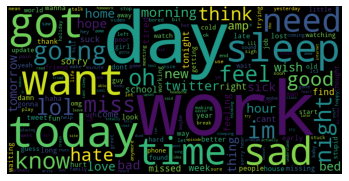

In [69]:
wc=WordCloud(width=800,height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

### spelling correction

In [70]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\s9802\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\s9802\AppData\Roaming\nltk_data...

Finished.



[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\s9802\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\s9802\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\s9802\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\s9802\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [71]:
from textblob import TextBlob

In [72]:
x="tanks forr watchin thiss vidio carr"

In [73]:
xx=TextBlob(x).correct()
xx

TextBlob("tanks for watching this video care")

### tokenization and lemmatization using TextBlob

In [74]:
x='thanks#for watching this video.'

In [75]:
TextBlob(x).words

WordList(['thanks', 'for', 'watching', 'this', 'video'])

In [76]:
doc=nlp(x)
for token in doc:
    print(token)

thanks#for
watching
this
video
.


In [77]:
from textblob import Word 

In [78]:
x='run runs running ran runner'

In [79]:
x.split()

['run', 'runs', 'running', 'ran', 'runner']

In [80]:
"  ".join(x.split())

'run  runs  running  ran  runner'

In [81]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
ran
runner


In [82]:
doc=nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
ran
runner


### detecting Entities using NER of Spacy

In [83]:
x="Donald Trump, the president of the USA is looking to sign a deal to mine the moon"

In [84]:
doc=nlp(x)
for ent in doc.ents:
    print(ent.text,'-',ent.label_,'-',spacy.explain(ent.label_))

Donald Trump - PERSON - People, including fictional
USA - GPE - Countries, cities, states


In [85]:
from spacy import displacy

In [86]:
displacy.render(doc,style='ent')

### detecting nouns

In [87]:
doc

Donald Trump, the president of the USA is looking to sign a deal to mine the moon

In [88]:
for noun in doc.noun_chunks:
    print(noun)

Donald Trump
the president
the USA
a deal
the moon


### translation and language detection

In [89]:
x

'Donald Trump, the president of the USA is looking to sign a deal to mine the moon'

In [90]:
tb=TextBlob(x)

In [91]:
tb.detect_language()

'en'

In [92]:
tb.translate(to='zh')

TextBlob("美国总统唐纳德·特朗普（Donald Trump）希望签署一项开采月球的协议")

In [93]:
tb.translate(to='ko')

TextBlob("미국 대통령 도널드 트럼프, 달 채굴 계약 체결")

### use inbuilt sentiment classifier

In [94]:
from textblob.sentiments import NaiveBayesAnalyzer

In [95]:
x='I love so much darling.'

In [96]:
tb=TextBlob(x,analyzer=NaiveBayesAnalyzer())

In [97]:
tb.sentiment    

Sentiment(classification='pos', p_pos=0.9162002734543347, p_neg=0.08379972654566493)

# 4. Advanced Text Processing

### N-grams

In [98]:
x='thanks for watching'

In [99]:
tb=TextBlob(x)

In [100]:
tb.ngrams(1)

[WordList(['thanks']), WordList(['for']), WordList(['watching'])]

In [101]:
tb.ngrams(2)

[WordList(['thanks', 'for']), WordList(['for', 'watching'])]

### Bag of words

In [102]:
x=['this is first sentence this is','this is second','This is last']

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
cv=CountVectorizer(ngram_range=(1,1))
text_counts=cv.fit_transform(x)
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [105]:
cv.get_feature_names()

['first', 'is', 'last', 'second', 'sentence', 'this']

In [106]:
bow=pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


### Term Frequency (TF)

simply the ratio of the count of a world present in a sentence, to the length of the sentence

In [107]:
x

['this is first sentence this is', 'this is second', 'This is last']

In [108]:
tf=bow.copy()
tf

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [109]:
for index,row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index,col]=tf.loc[index,col]/sum(row[1].values)
tf

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.000000,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.000000,0.333333,0.000000,0.333333
2,0.000000,0.333333,0.333333,0.000000,0.000000,0.333333


### Inverse Document Frequency (IDF)

In [110]:
import numpy as np

In [111]:
x_df=pd.DataFrame(x,columns=['words'])
x_df

,words
0,this is first sentence this is
1,this is second
2,This is last


In [112]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,1,1,0,0,1


In [113]:
N=bow.shape[0]

In [114]:
N

3

In [115]:
bb=bow.astype('bool')
bb

,first,is,last,second,sentence,this
0,True,True,False,False,True,True
1,False,True,False,True,False,True
2,False,True,True,False,False,True


In [116]:
bb['first'].sum()

1

In [117]:
cols=bb.columns
cols

Index(['first', 'is', 'last', 'second', 'sentence', 'this'], dtype='object')

In [118]:
nz=[]
for col in cols:
    nz.append(bb[col].sum())

In [119]:
nz

[1, 3, 1, 1, 1, 3]

In [120]:
idf=[]
for index,col in enumerate(cols):
    idf.append(np.log((N+1)/(nz[index]+1))+1)

In [121]:
idf

[1.6931471805599454,
 1.0,
 1.6931471805599454,
 1.6931471805599454,
 1.6931471805599454,
 1.0]

### TF-IDF

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [277]:
type(x_df['words'])

pandas.core.series.Series

In [123]:
tfidf=TfidfVectorizer()
x_tfidf=tfidf.fit_transform(x_df['words'])

In [124]:
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.45329466, 0.76749457, 0.        , 0.        ,
        0.45329466]])

In [125]:
tfidf.idf_

array([1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.        ])

# 5. Word Embedding

### Spacy Word2Vec

In [126]:
nlp=spacy.load('en_core_web_sm')

In [127]:
doc=nlp('king queen man woman qwe')

In [128]:
for token in doc:
    print(token.text, token.has_vector)

king True
queen True
man True
woman True
qwe True


In [129]:
token.vector.shape

(96,)

In [279]:
nlp('king').vector

array([ 2.9139581e+00, -1.0016745e+00, -2.0298631e+00,  4.4045717e-01,
       -1.0259336e+00, -1.2732614e+00,  2.3712325e+00,  2.1475375e-02,
       -3.2159474e+00,  3.0835023e+00,  8.9685971e-01, -1.1318012e+00,
       -2.7281046e-04,  9.1702938e-01,  1.1167793e+00, -2.8955090e-01,
       -5.2588379e-01,  1.3412240e+00, -2.5638945e+00,  3.1032307e+00,
       -7.6287061e-02, -7.2169280e-01,  1.8055370e+00, -5.2969277e-01,
       -9.8598868e-01, -9.1488796e-01,  4.5880041e-01, -1.2740698e+00,
        1.5132596e+00, -1.8060901e+00, -1.7065282e+00, -1.3216661e+00,
        4.8007751e+00, -1.3426121e-01, -9.9779129e-01,  4.3230305e+00,
        3.6355984e-01, -1.6250327e+00, -1.2807034e+00, -1.2762814e+00,
        1.4773893e+00,  5.6884847e+00,  1.1288887e+00, -8.6327493e-01,
        7.0138943e-01, -3.8181858e+00,  3.5870191e-01,  4.8530345e+00,
       -1.0350802e+00, -3.5739625e-01, -4.5156507e+00, -8.2374918e-01,
        2.0293601e+00, -3.8062325e-01, -1.6465064e+00,  1.8852234e+00,
      

In [131]:
for token1 in doc:
    for token2 in doc:
        print(token1.text,token2.text,token1.similarity(token2))

king king 1.0
king queen 0.48674083
king man 0.44998312
king woman 0.40926796
king qwe 0.16053429
queen king 0.48674083
queen queen 1.0
queen man 0.48837954
queen woman 0.41143766
queen qwe 0.15164015
man king 0.44998312
man queen 0.48837954
man man 1.0
man woman 0.5520831
man qwe 0.16463488
woman king 0.40926796
woman queen 0.41143766
woman man 0.5520831
woman woman 1.0
woman qwe 0.23645361
qwe king 0.16053429
qwe queen 0.15164015
qwe man 0.16463488
qwe woman 0.23645361
qwe qwe 1.0


C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until


# 6. Machine Learning Models for Text Classification

### BoW

In [132]:
df.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,emails,email_count
0,switchfoot awww bummer shoulda david carr d,0,19,115,5.105263,4,0,1,0,0,[],0
1,upset update facebook texting cry result schoo...,0,21,111,4.333333,9,0,0,0,0,[],0
2,kenichan dived times ball managed save 50 rest...,0,18,89,4.000000,7,0,1,0,0,[],0
3,body feels itchy fire,0,10,47,3.800000,5,0,0,0,0,[],0
4,nationwideclass behaving mad,0,21,111,4.333333,10,0,1,0,0,[],0


In [133]:
df0=df[df['sentiment']==0].sample(2000)
df4=df[df['sentiment']==4].sample(2000)

In [189]:
dfr=df0.append(df4)
dfr.shape

(4000, 12)

In [159]:
dfr_feat=dfr.drop(labels=['twits','sentiment','emails'],axis=1).reset_index()

In [160]:
dfr_feat

,index,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,email_count
0,284215,21,121,4.809524,8,1,1,0,1,0
1,427134,16,84,4.312500,6,0,1,0,1,0
2,358232,25,117,3.720000,16,0,0,0,0,0
3,50162,9,41,3.666667,4,0,0,0,0,0
4,215969,16,90,4.687500,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3995,1325736,4,22,4.750000,1,0,0,0,0,0
3996,1049706,13,79,5.153846,6,0,1,0,0,0
3997,1003785,16,88,4.562500,7,0,0,0,1,0
3998,1193902,5,24,4.000000,2,0,0,0,0,0


In [137]:
y=dfr['sentiment']

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

In [139]:
cv=CountVectorizer()
text_counts=cv.fit_transform(dfr['twits'])

In [140]:
text_counts.toarray().shape

(4000, 9712)

In [148]:
dfr_bow=pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())

In [149]:
dfr_bow

,01614948343,07,09,0xe8000075,10,100,1000,1000th,100x,1025,...,zombie,zomg,zone,zoo,zoolander,zoopedup,zoovroo,zsbcreations,zzzzs,zzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### ML algorithms

In [143]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [144]:
sgd=SGDClassifier(n_jobs=-1,random_state=42,max_iter=200)
lgr=LogisticRegression(random_state=42,max_iter=200)
lgrcv=LogisticRegressionCV(cv=2,random_state=42,max_iter=1000)
svm=LinearSVC(random_state=42,max_iter=200)
rfc=RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators=200)

In [145]:
clf={'SGD':sgd,'LGR':lgr,'LGRCV':lgrcv,'SVM':svm,'RFC':rfc}

In [146]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGRCV', 'SVM', 'RFC'])

In [152]:
def classify(x,y):
    scaler=MinMaxScaler(feature_range=(0,1))
    x=scaler.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
    for key in clf.keys():
        clf[key].fit(x_train,y_train)
        y_pred=clf[key].predict(x_test)
        ac=accuracy_score(y_test,y_pred)
        print(key,'-->',ac)

In [153]:
y

284215     0
427134     0
358232     0
50162      0
215969     0
          ..
1325736    4
1049706    4
1003785    4
1193902    4
1305592    4
Name: sentiment, Length: 4000, dtype: int64

In [163]:
%%time
classify(dfr_bow,y)

SGD --> 0.64125
LGR --> 0.6575
LGRCV --> 0.66
SVM --> 0.64125
RFC --> 0.65
Wall time: 33.4 s


### Manual Feature to train the model

In [167]:
dfr_feat=dfr_feat.drop(['index'],axis=1)

In [168]:
dfr_feat

,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,email_count
0,21,121,4.809524,8,1,1,0,1,0
1,16,84,4.312500,6,0,1,0,1,0
2,25,117,3.720000,16,0,0,0,0,0
3,9,41,3.666667,4,0,0,0,0,0
4,16,90,4.687500,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
3995,4,22,4.750000,1,0,0,0,0,0
3996,13,79,5.153846,6,0,1,0,0,0
3997,16,88,4.562500,7,0,0,0,1,0
3998,5,24,4.000000,2,0,0,0,0,0


In [156]:
%%time
classify(dfr_feat,y)

SGD --> 0.58
LGR --> 0.58125
LGRCV --> 0.58
SVM --> 0.57625
RFC --> 0.54
Wall time: 839 ms


### Manual + Bow

In [169]:
X=dfr_feat.join(dfr_bow)
X

,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,email_count,01614948343,...,zombie,zomg,zone,zoo,zoolander,zoopedup,zoovroo,zsbcreations,zzzzs,zzzzzzzzzzzzzzz
0,21,121,4.809524,8,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,84,4.312500,6,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25,117,3.720000,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,41,3.666667,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,90,4.687500,4,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4,22,4.750000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,13,79,5.153846,6,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,16,88,4.562500,7,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,5,24,4.000000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
%%time
classify(X,y)

SGD --> 0.6425
LGR --> 0.66
LGRCV --> 0.66625
SVM --> 0.645
RFC --> 0.65625
Wall time: 29 s


### TFIDF

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [173]:
dfr.head()

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,emails,email_count
284215,ijustine fail whale fail whale error haha psh ...,0,21,121,4.809524,8,1,1,0,1,[],0
427134,sarahchambers19 oh hai shame chile soon xx,0,16,84,4.312500,6,0,1,0,1,[],0
358232,asked drive pissed phone,0,25,117,3.720000,16,0,0,0,0,[],0
50162,fast long break,0,9,41,3.666667,4,0,0,0,0,[],0
215969,saralovesnichol change amazing jonas life mess...,0,16,90,4.687500,4,0,1,0,1,[],0


In [281]:
tfidf=TfidfVectorizer()
x=tfidf.fit_transform(dfr['twits'])
x

<4000x9712 sparse matrix of type '<class 'numpy.float64'>'
	with 23335 stored elements in Compressed Sparse Row format>

In [177]:
%%time
classify(pd.DataFrame(x.toarray()),y)

SGD --> 0.6425
LGR --> 0.67875
LGRCV --> 0.66125
SVM --> 0.64125
RFC --> 0.655
Wall time: 42.2 s


### Word2vec

In [215]:
def get_vec(x):
    doc=nlp(x)
    return doc.vector.reshape(1,-1)

In [194]:
dfr=dfr.reset_index()

In [200]:
dfr=dfr.drop(['index'],axis=1)

In [201]:
dfr

,twits,sentiment,word_count,char_count,avg_word_len,stopwords_len,hashtag_len,mention_len,numeric_count,upper_count,emails,email_count
0,ijustine fail whale fail whale error haha psh ...,0,21,121,4.809524,8,1,1,0,1,[],0
1,sarahchambers19 oh hai shame chile soon xx,0,16,84,4.312500,6,0,1,0,1,[],0
2,asked drive pissed phone,0,25,117,3.720000,16,0,0,0,0,[],0
3,fast long break,0,9,41,3.666667,4,0,0,0,0,[],0
4,saralovesnichol change amazing jonas life mess...,0,16,90,4.687500,4,0,1,0,1,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,ttyl,4,4,22,4.750000,1,0,0,0,0,[],0
3996,futurehensley wait freaking excited,4,13,79,5.153846,6,0,1,0,0,[],0
3997,3am bed managed finish header tomorrow animation,4,16,88,4.562500,7,0,0,0,1,[],0
3998,passion pit shit,4,5,24,4.000000,2,0,0,0,0,[],0


In [245]:
list=[]
for i in range(4000):
    if dfr['twits'][i] =='':
        list.append(i)
list

[899, 1021, 1218, 1419, 1596, 1655, 1705, 2031, 2333, 2872, 3632, 3732]

In [251]:
for i in list:
    dfr['twits'][i] =' '

C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [252]:
list=[]
for i in range(4000):
    if dfr['twits'][i] =='':
        list.append(i)
list

[]

In [253]:
%%time
dfr['vec']=dfr['twits'].apply(lambda x: get_vec(x))

Wall time: 28.3 s


In [254]:
x=np.concatenate(dfr['vec'].to_numpy(),axis=0)
x.shape

(4000, 96)

In [257]:
classify(pd.DataFrame(x),y)

SGD --> 0.54625
LGR --> 0.56125
LGRCV --> 0.55875


C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SVM --> 0.55125
RFC --> 0.56625


In [260]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred=clf[key].predict(get_vec(x))
        print(key,'-->',y_pred)

In [263]:
predict_w2v('i love you so much')

SGD --> [4]
LGR --> [4]
LGRCV --> [4]
SVM --> [4]
RFC --> [4]


In [264]:
predict_w2v('i think i will not do that again')

SGD --> [0]
LGR --> [0]
LGRCV --> [0]
SVM --> [0]
RFC --> [0]


In [265]:
predict_w2v('congratulations. you look good')

SGD --> [4]
LGR --> [4]
LGRCV --> [4]
SVM --> [0]
RFC --> [0]
